# **Winfred Mutinda**

## **Bitcoin price prediction with Artificial Neural Network (ANN)**

## **African Institute of Mathematical Sciences (AIMS), South Africa**


This code uses ANN in predicting bitcoin price using historical data from yahoo finance.

### **Loading the needed Python libraries**

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential ## layers from left to right
from keras.layers import Dense ## For fully connected layers
from keras import metrics  ## To get the MSE
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy.random import seed  ## for reproducibility
seed(12)

%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow is already loaded. Please restart the runtime to change versions.
2.3.0


We install yfinance to enable us access data from yahoo finance website

In [ ]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=25cf15f69dc2d9e29211ec28fcc77831e987e8d78d4baee269b72dec742316c8
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


### **Loading the dataset**

In [ ]:
import yfinance as yf
data= yf.download ("BTC-USD",start="2014-09-17",end="2020-08-05")

[*********************100%***********************]  1 of 1 completed


### Viewing the first 10 records

In [ ]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400


### Checking the shape of the data

In [ ]:
data.shape

(2149, 6)

We have 2149 observations/data points and 6 columns/features

## Create a dataframe with only the close column

Here, we select the Close column which we will use in our prediction

In [ ]:
dataset= data.filter(['Close'])
dataset

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2020-07-31,11323.466797
2020-08-01,11759.592773
2020-08-02,11053.614258


## Convert the dataframe into a numpy array

In [ ]:
Data=dataset.values
Data

array([[  457.33401489],
       [  424.44000244],
       [  394.79598999],
       ...,
       [11053.61425781],
       [11246.34863281],
       [11747.02246094]])

## **Preprocessing our dataset**

## **Normalization**

We will scale our data to be between a range of 0 and 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Data)

## Viewing the scaled data
scaled_data


array([[0.01445348],
       [0.01275083],
       [0.0112164 ],
       ...,
       [0.56293513],
       [0.5729114 ],
       [0.59882713]])

 ## Viewing the scaled data

In [ ]:
scaled_data

array([[0.01445348],
       [0.01275083],
       [0.0112164 ],
       ...,
       [0.56293513],
       [0.5729114 ],
       [0.59882713]])

## Checking the shape of the scaled data

In [ ]:
scaled_data.shape

(2149, 1)

## Getting the number of rows to train the model on


In [ ]:
import math
training_data_len = math.ceil(len(Data)*.7)
training_data_len


1505

### **Creating the training dataset with 10 days lookback**




In [ ]:
## Create the scaled training dataset
Train_data = scaled_data[0:training_data_len, :]

## Split the data into X_train and Y_train datasets
X_train = []
Y_train = []
for i in range (10, len(Train_data)):
  X_train.append(Train_data[i-10:i, 0])
  Y_train.append(Train_data[i,0])
  if i<=10:
    print(X_train)
    print(Y_train)
    print()


[array([0.01445348, 0.01275083, 0.0112164 , 0.01194666, 0.01142474,
       0.01159716, 0.01333837, 0.0126869 , 0.01208486, 0.01171481])]
[0.011460923638898541]



## Convert the X_train and Y_train to numpy arrays

In [ ]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
## Checking the shape of the data
X_train.shape


(1495, 10)

In [ ]:
Y_train.shape

(1495,)

## **Creating the ANN Model**

In [ ]:
def network_model():
  
    model = Sequential()

    model.add(Dense(10, input_dim=10, activation='linear'))
  
    model.add(Dense(6, activation='linear'))

    model.add(Dense(1, activation='linear'))
    
    # Compile the model
    model.compile(loss='mean_squared_error', 
                  optimizer='adam',
                  metrics=[metrics.mse])
    
    return model

## Initialising the model

In [ ]:
model=network_model()

## Determining the number of training parameters

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 183
Trainable params: 183
Non-trainable params: 0
_________________________________________________________________


## Fitting the model

In [ ]:
import time
start = time.time()

In [ ]:
Result = model.fit(X_train, Y_train, epochs=300, batch_size=120, validation_split=0.2,verbose=1)
print("> Compilation Time : ", time.time() - start)

Epoch 1/300
10/10 [==============================] - 0s 18ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 7.5155e-04 - mean_squared_error: 7.5155e-04 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 5.9597e-04 - mean_squared_error: 5.9597e-04 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 4/300
10/10 [==============================] - 0s 3ms/step - loss: 4.4181e-04 - mean_squared_error: 4.4181e-04 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 3.9906e-04 - mean_squared_error: 3.9906e-04 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 6/300
10/10 [==============================] - 0s 3ms/step - loss: 3.7313e-04 - mean_squared_error: 3.7313e-04 - val_loss: 0.0018 - val_mean_squared_error: 

## **Plot of the training loss verses the validation loss**

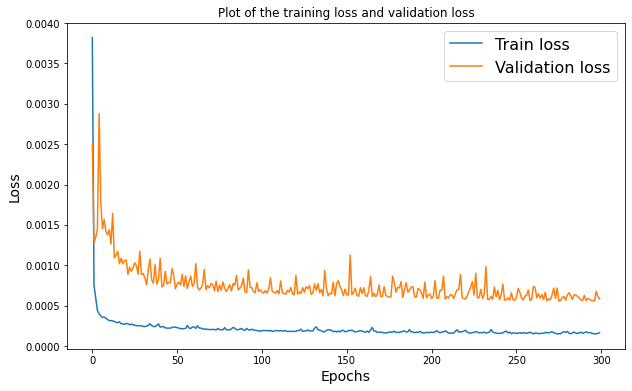

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(Result.epoch,Result.history['loss'],label="Train loss")
plt.plot(Result.epoch,Result.history['val_loss'],label="Validation loss")
plt.legend(fontsize=16)
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Loss",fontsize=14)
plt.title('Plot of the training loss and validation loss')
plt.show()

### **Prediction on the testing dataset**

### Creating the testing dataset

In [ ]:
### create a new array containing scaled values from index  1445 to 2149
Test_data = scaled_data[training_data_len-10:, :]

### Create the datasets X_test and Y_test
X_test = []
Y_test = Data[training_data_len:, :]

for i in range (10, len(Test_data)):
  X_test.append (Test_data[i-10:i, 0])

### Convert the data to a numpy array

In [ ]:
x_test = np.array(X_test)

In [ ]:
y_test=np.array(Y_test)

In [ ]:
test_prediction = model.predict(x_test)

In [ ]:
test_prediction[0:30]

array([[0.31161603],
       [0.31206238],
       [0.31282672],
       [0.31336457],
       [0.31377092],
       [0.31286645],
       [0.31748673],
       [0.31545287],
       [0.32118288],
       [0.31790692],
       [0.31444827],
       [0.3165354 ],
       [0.31570348],
       [0.31202236],
       [0.31382924],
       [0.2845338 ],
       [0.27598146],
       [0.27833962],
       [0.268144  ],
       [0.27106228],
       [0.24499147],
       [0.21110578],
       [0.23223408],
       [0.2058178 ],
       [0.1990663 ],
       [0.19487786],
       [0.18956983],
       [0.18553564],
       [0.1750742 ],
       [0.19690557]], dtype=float32)

## Transforming the test data 

In [ ]:
Test_prediction=scaler.inverse_transform(test_prediction)
Test_prediction[0:20]

array([[6198.306 ],
       [6206.929 ],
       [6221.696 ],
       [6232.0864],
       [6239.937 ],
       [6222.4634],
       [6311.724 ],
       [6272.431 ],
       [6383.131 ],
       [6319.8413],
       [6253.023 ],
       [6293.345 ],
       [6277.273 ],
       [6206.156 ],
       [6241.064 ],
       [5675.096 ],
       [5509.871 ],
       [5555.429 ],
       [5358.457 ],
       [5414.836 ]], dtype=float32)

## Plotting the predictions on the scaled data for testing and compare with the actual



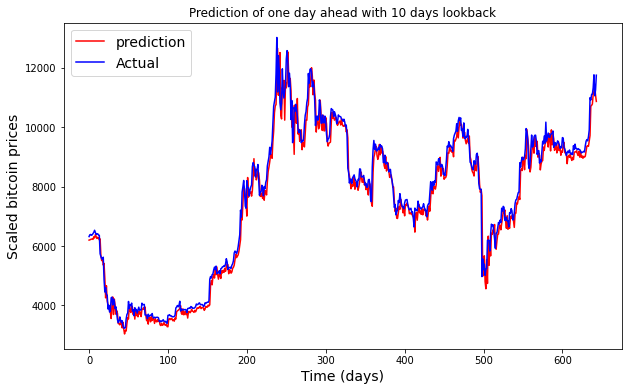

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(Test_prediction,color='r',label="prediction")
plt.plot(Y_test,color='b',label="Actual")
plt.legend(fontsize=16)
plt.xlabel("Time (days)",fontsize=14)
plt.ylabel("Scaled bitcoin prices",fontsize=14)
plt.title('Prediction of one day ahead with 10 days lookback')
plt.legend(fontsize=14)
plt.show()

## **Computing the accuracy of our model**

### **We use four measures to compute our model accuracy, namely: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)**.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def mean_absolute_percentage_error(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
Error1= mean_squared_error(y_test,Test_prediction)
RMSE = np.sqrt(Error1)
Error2 = mean_absolute_error(y_test,Test_prediction)
Error3 = mean_absolute_percentage_error(y_test,Test_prediction)

print('The Mean Squared Error is: ', Error1)
print
print('The Root Mean Squared Error is: ', RMSE)
print
print('The Mean Absolute Error is: ', Error2)
print 
print('The Mean Absolute Percentage Error is: ', Error3)



The Mean Squared Error is:  140018.09058388346
The Root Mean Squared Error is:  374.1899124560728
The Mean Absolute Error is:  263.2180335003397
The Mean Absolute Percentage Error is:  3.5840561077936184
